In [41]:
import sympy as sp
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [42]:
# The following is based on https://en.wikipedia.org/wiki/Neo-Hookean_solid
# -> Uniaxial Extension / Compressible neo-Hookean material

In [43]:
# Neo-Hookean
alpha, mu, D1 = sp.symbols(r'\alpha \mu D_{1}', positive=True)
J, I1n, I1 = sp.symbols(r'J \bar{I_1} I_1')
lambda1N, lambda2N, lambda3N = sp.symbols(r'\bar{\lambda}_1 \bar{\lambda}_2 \bar{\lambda}_3', positive=True)

Psi_Ogden = 2 * mu * ( lambda1N**(alpha) + lambda2N**(alpha) + lambda3N**(alpha) - 3) / alpha**2 + 1/D1 * (J-1)**2



Psis = [Psi_Ogden]
Psi  = Psis[0]
display(Psi)

2*\mu*(\bar{\lambda}_1**\alpha + \bar{\lambda}_2**\alpha + \bar{\lambda}_3**\alpha - 3)/\alpha**2 + (J - 1)**2/D_{1}

In [44]:
lambda1, lambda2, lambda3 = sp.symbols(r'\lambda_1 \lambda_2 \lambda_3', positive=True)

lambda1NFunction= J**(-sp.Rational(1,3)) * lambda1
lambda2NFunction= J**(-sp.Rational(1,3)) * lambda2
lambda3NFunction= J**(-sp.Rational(1,3)) * lambda3
JFunction = lambda1*lambda2*lambda3
#Psi = Psi.subs({C1:C1Function,D1:D1Function, J:JFunction, I1:I1Function})
Psi_subs = Psi.subs({lambda1N:lambda1NFunction, lambda2N:lambda2NFunction, lambda3N:lambda3NFunction})
display(Psi_subs)
Psi_subs = Psi_subs.subs({J:JFunction})
display(Psi_subs)

2*\mu*((\lambda_1/J**(1/3))**\alpha + (\lambda_2/J**(1/3))**\alpha + (\lambda_3/J**(1/3))**\alpha - 3)/\alpha**2 + (J - 1)**2/D_{1}

2*\mu*((\lambda_3**(2/3)/(\lambda_1**(1/3)*\lambda_2**(1/3)))**\alpha + (\lambda_2**(2/3)/(\lambda_1**(1/3)*\lambda_3**(1/3)))**\alpha + (\lambda_1**(2/3)/(\lambda_2**(1/3)*\lambda_3**(1/3)))**\alpha - 3)/\alpha**2 + (\lambda_1*\lambda_2*\lambda_3 - 1)**2/D_{1}

In [45]:
# Cauchy Stress
sigma11, sigma22, sigma33 = sp.symbols(r'\sigma_{11} \sigma_{22} \sigma_{33}')
sigma11 = lambda1*sp.Derivative(Psi_subs, lambda1)/(lambda1*lambda2*lambda3)
sigma11 = sigma11.doit()
sigma22 = lambda2*sp.Derivative(Psi_subs, lambda2)/(lambda1*lambda2*lambda3)
sigma22 = sigma22.doit()
sigma33 = lambda3*sp.Derivative(Psi_subs, lambda3)/(lambda1*lambda2*lambda3)
sigma33 = sigma33.doit()
display(sp.simplify(sigma11))

(\lambda_1*\lambda_2*\lambda_3)**(-\alpha/3 - 1)*(4*D_{1}*\lambda_1**\alpha*\mu/3 - 2*D_{1}*\lambda_2**\alpha*\mu/3 - 2*D_{1}*\lambda_3**\alpha*\mu/3 - 2*\alpha*(\lambda_1*\lambda_2*\lambda_3)**(\alpha/3 + 1) + 2*\alpha*(\lambda_1*\lambda_2*\lambda_3)**(\alpha/3 + 2))/(D_{1}*\alpha)

In [46]:
# uniaxial stretch ratio
stretch = sp.symbols(r'\hat{\lambda}', positive=True)
lambda1Function = stretch
lambda2Function = lambda2
lambda3Function = lambda2

# get stretch ratio on other two directions (lambda2)
JFunction_uniaxial = JFunction.subs({lambda1:lambda1Function, lambda2:lambda2Function, lambda3:lambda3Function})
lambda2Function_uniaxial = sp.solve(JFunction_uniaxial-J, lambda2)[1]
display(lambda2Function_uniaxial)


sqrt(J)/sqrt(\hat{\lambda})

In [49]:
# Compute Cauchy stress for uniaxial loading case
sigma11_uniaxial = sigma11.subs({lambda1:lambda1Function, lambda2:lambda2Function_uniaxial, lambda3:lambda2Function_uniaxial})
sigma22_uniaxial = sigma22.subs({lambda1:lambda1Function, lambda2:lambda2Function_uniaxial, lambda3:lambda2Function_uniaxial})
sigma33_uniaxial = sigma33.subs({lambda1:lambda1Function, lambda2:lambda2Function_uniaxial, lambda3:lambda2Function_uniaxial})
display(sp.simplify(sigma11_uniaxial))
display(sp.simplify(sigma22_uniaxial))



-4*J**(\alpha/6)*\hat{\lambda}**(-\alpha/2)*\mu/(3*J*\alpha) + 4*\mu*(\hat{\lambda}/J**(1/3))**\alpha/(3*J*\alpha) + 2*J/D_{1} - 2/D_{1}

2*J**(\alpha/6)*\hat{\lambda}**(-\alpha/2)*\mu/(3*J*\alpha) - 2*J**(-\alpha/3)*\hat{\lambda}**\alpha*\mu/(3*J*\alpha) + 2*J/D_{1} - 2/D_{1}

In [20]:
# Computation of sigma11 now requires value of J
# to eliminate J, we exploit that sigma22=sigma33=0
# therefore: sigma11 - sigma33 = sigma11
sigma_11_33_uniaxial = sp.simplify(sigma11_uniaxial - sigma33_uniaxial)
display(sigma_11_33_uniaxial)
# equating both expressions for sigma11 provides an expression for J
eqn_J = sp.simplify(sigma11_uniaxial - sigma_11_33_uniaxial)
sp.simplify(eqn_J)

2*J**(-\alpha/3 - 1)*\hat{\lambda}**(-\alpha)*\mu*(-J**(\alpha/2)*\hat{\lambda}**(\alpha/2) + \hat{\lambda}**(2*\alpha))/\alpha

2*J**(\alpha/6)*\hat{\lambda}**(-\alpha/2)*\mu/(3*J*\alpha) - 2*J**(-\alpha/3)*\hat{\lambda}**\alpha*\mu/(3*J*\alpha) + 2*J/D_{1} - 2/D_{1}

In [21]:
# this expression has no analytic solution for J
#J_uniaxial = sp.solve(eqn_J, J)
#J_uniaxial

In [50]:
eqn_J_prime = sp.diff(eqn_J, J)
eqn_J_prime

J**(\alpha/6)*\hat{\lambda}**(-\alpha/2)*\mu/(9*J**2) - 2*J**(\alpha/6)*\hat{\lambda}**(-\alpha/2)*\mu/(3*J**2*\alpha) + 2*J**(-\alpha/3)*\hat{\lambda}**\alpha*\mu/(9*J**2) + 2*J**(-\alpha/3)*\hat{\lambda}**\alpha*\mu/(3*J**2*\alpha) + 2/D_{1}

In [75]:
# therefore we try computing J numerically, given the other parameters: uniaxial stretch ratio, C1, D1
from scipy import optimize 

eqn_J_prime = sp.diff(eqn_J, J)
J_est_function = sp.lambdify((J, stretch, mu, D1, alpha), eqn_J, 'numpy')
J_est_prime_function = sp.lambdify((J, stretch, mu, D1, alpha), eqn_J_prime, 'numpy')

def compute_J(current_stretch, fixed_mu, fixed_D1, fixed_alpha):
    #J_est = optimize.root_scalar(J_est_function, x0=1, args=(current_stretch, fixed_C1, fixed_D1), method='brentq', bracket=[0.1,10])
    J_est = optimize.root_scalar(J_est_function, x0=1, args=(current_stretch, fixed_mu, fixed_D1, fixed_alpha), method='newton', fprime=J_est_prime_function)
    return J_est

# test
root = compute_J(current_stretch=0.8, fixed_mu=1, fixed_D1=0.1, fixed_alpha=2)
root

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 3
           root: 0.9898739757026921

In [81]:
# compute sigma11 using estimated J for given stretch, C1, D1

sigma11_uniaxial_function = sp.lambdify((J, stretch, mu, D1, alpha), sigma11_uniaxial, 'numpy')
sigma22_uniaxial_function = sp.lambdify((J, stretch, mu, D1, alpha), sigma22_uniaxial, 'numpy')

def compute_sigmas(stretch_array, mu, D1, alpha):
    sigma11 = np.zeros(stretch_array.shape)
    sigma22 = np.zeros(stretch_array.shape)
    for i in range(stretch_array.shape[0]):
        current_stretch = stretch_array[i]
        #print(current_stretch)
        try:
            root = compute_J(current_stretch, mu, D1, alpha)
            #print(root)
            J_est = root.root
            sigma11[i] = sigma11_uniaxial_function(J_est, current_stretch, mu, D1, alpha)
            sigma22[i] = sigma22_uniaxial_function(J_est, current_stretch, mu, D1, alpha)
        except Exception as e:
            print(e)
            sigma11[i] = np.nan
            sigma22[i] = np.nan
    return sigma11, sigma22

In [88]:
C_1_val = 1e3
mu_val = 2*C_1_val
D_1_val = 1e-8
alpha_val = 2

stretch_min = 0.1
stretch_max = 4
stretch_delta = 0.01
stretch_array = np.arange(stretch_min,stretch_max,stretch_delta)

sigma11, sigma22 = compute_sigmas(stretch_array, mu_val, D_1_val, alpha_val)
#sigma11

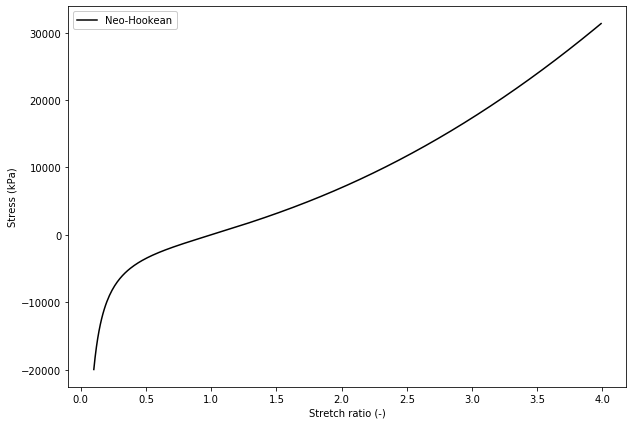

In [89]:

plt.rc('figure', figsize=[10,7])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.cla()
ax.plot(stretch_array, sigma11,  color = 'k', linestyle = '-', label='Neo-Hookean')
ax.set_xlabel('Stretch ratio (-)')
ax.set_ylabel('Stress (kPa)')
# plt.xlim([0.8, 1.2])
# plt.ylim([-0.5, 0.5])
plt.legend(loc='upper left', frameon=True, framealpha=1)
plt.show()